In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py

In [45]:
plotly.tools.set_credentials_file(username = 'eccentric_genius', api_key = '1wmWYP8uCw3hYaYM1El0')

In [2]:
%matplotlib inline

In [87]:
print(py)


<module 'plotly.plotly' from '/home/ishan/.local/lib/python3.6/site-packages/plotly/plotly/__init__.py'>


In [4]:
df_apps = pd.read_csv("cleaned_google_play_store_apps_data.csv", index_col=0)

In [5]:
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity


In [7]:
df_apps.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
dtype: object

In [ ]:
#distribution of paid and free apps on the play store

df_apps[['Type', 'App']].groupby(by = 'Type').agg('count').plot(kind='bar')

In [ ]:
sns.set()


In [ ]:
#let's find which are top-5 paid apps
df_apps[df_apps['Type'] == 'Paid'][['Installs', 'App']].sort_values(by = 'Installs', ascending = False).head(5)

In [ ]:
#let's see how many reviews these paid apps have
df_apps[df_apps['Type'] == 'Paid'][['Installs', 'App', 'Reviews']].sort_values(by = 'Installs', ascending = False).head(5)

Text(0, 0.5, 'Reviews in x100')

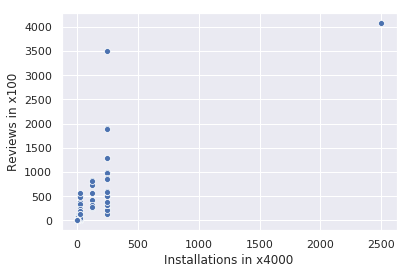

In [10]:
#is there any relationship between reviews and installs in case of paid apps?
sns.set()
sns.scatterplot(x=(df_apps[df_apps['Type'] == 'Paid']['Installs'])/4000, y=(df_apps[df_apps['Type'] == 'Paid']['Reviews'])/100)
plt.xlabel("Installations in x4000")
plt.ylabel("Reviews in x100")

 clearly there is no proper relationship between Installations and Reviews in case of paid apps, lets see in case of free apps

Text(0.5, 0, 'Reviews in x200')

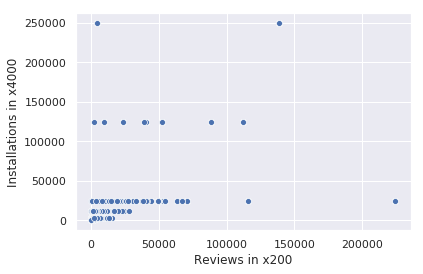

In [9]:
#is there any relationship between reviews and installs in case of free apps?
sns.set()
sns.scatterplot(y=(df_apps[df_apps['Type'] == 'Free']['Installs'])/4000, x=(df_apps[df_apps['Type'] == 'Free']['Reviews'])/200)
plt.ylabel("Installations in x4000")
plt.xlabel("Reviews in x200")

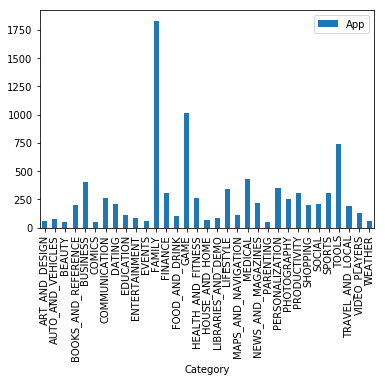

In [8]:
#number of apps category wise
df_apps[['Category', 'App']].groupby('Category').agg('count').plot(kind='bar')

Is there any relationship between size of apps and downloads? let's find out..

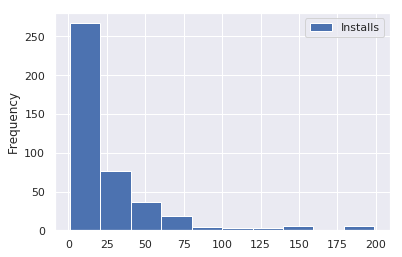

In [29]:
df_apps[["Size", "Installs"]].groupby("Size").agg('count').reset_index().plot(x = 'Size', y = 'Installs', kind = 'hist')

In [72]:
df = df_apps[["Rating", "Installs"]].groupby("Rating").agg('count').reset_index()
df.head()

df['Rating']

0     1.0
1     1.2
2     1.4
3     1.5
4     1.6
5     1.7
6     1.8
7     1.9
8     2.0
9     2.1
10    2.2
11    2.3
12    2.4
13    2.5
14    2.6
15    2.7
16    2.8
17    2.9
18    3.0
19    3.1
20    3.2
21    3.3
22    3.4
23    3.5
24    3.6
25    3.7
26    3.8
27    3.9
28    4.0
29    4.1
30    4.2
31    4.3
32    4.4
33    4.5
34    4.6
35    4.7
36    4.8
37    4.9
38    5.0
Name: Rating, dtype: float64

clearly we can see that app between size 0 - 25 MB are downloaded more

Now lets find out distribution of rating vs installs

In [77]:
import plotly.graph_objs as go

Rating = [df['Rating']]
Installs = [df['Installs']]

trace0 = go.Scatter(
    x=Installs,
    y=Rating,
    mode='markers',
    name='Installs of apps grouped by rating',
    marker=dict(
        color='rgba(156, 165, 196, 0.95)',
        line=dict(
            color='rgba(156, 165, 196, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=20,
    )
)

data = [trace0]
layout = go.Layout(
    title="Apps Installations grouped by Rating",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
        showticklabels=True,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=140,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),
    width=800,
    height=600,
    paper_bgcolor='rgb(254, 247, 234)',
    plot_bgcolor='rgb(254, 247, 234)',
    hovermode='closest',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = "Apps vs Ratings")

'3.9.0'